# Problem Set 2: Classical Dynamics

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part A: Diatomic Molecules
### A1: The Lennard-Jones Potential
#### a)

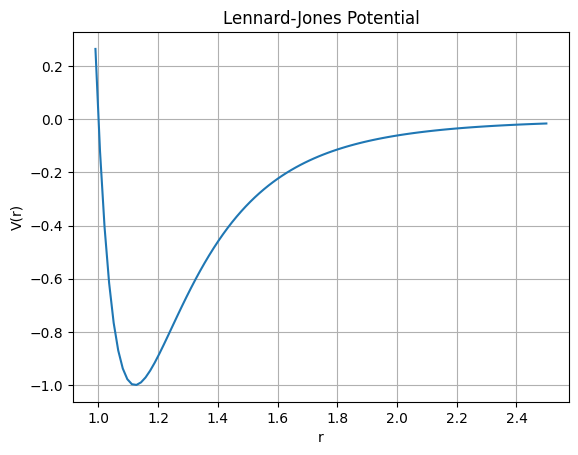

In [3]:
epsilon = 1
sigma = 1

x1 = np.linspace(0.99, 2.5, 100)
potential = 4*epsilon*((sigma/x1)**12 - (sigma/x1)**6)

plt.plot(x1, potential); plt.xlabel('r'); plt.ylabel("V(r)"); plt.title("Lennard-Jones Potential"); plt.grid(); plt.show()

#### b)

![Alt text](Pset02.png)

#### c)

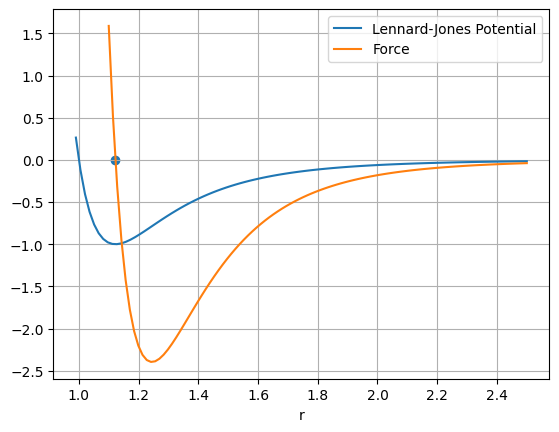

In [4]:
epsilon = 1.0
sigma = 1.0

x2 = np.linspace(1.1, 2.5, 100)
Force = -(24*(((epsilon*(sigma**6))/x2**7) - (2*epsilon*(sigma**12))/x2**13))

#x1 and potential are from the last question
plt.plot(x1, potential, label="Lennard-Jones Potential") 
plt.plot(x2, Force, label="Force")
plt.scatter(1.1225,0)
plt.xlabel('r');plt.legend();plt.grid();plt.show()

#### d)
#### The atoms will seperate from one another intially if we start them at r = 1 until they reach the bottom of the well. The sign of the force between them at this point is negative. This is not consistent with my first statement because a negative force will act to bring the atoms closer together.

### A2: Dynamics
#### a)

In [5]:
r0 = 2 
v0 = -0.1
r = [r0]
v = [v0]
h = 0.02
m = 1
t = [0]
end_time = 10

while t[-1] < end_time - h:
    Fr = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #this expression is essentially the one from the last cell
    r_new = r[-1] + (h*v[-1]) + (((h**2)*Fr)/(2*m)) #step 1
    r.append(r_new)
    Fr_new = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #step 2
    v_new = v[-1] + ((h/2*m)*(Fr + Fr_new)) #step 3
    v.append(v_new)
    t.append(t[-1] + h)


#### b)

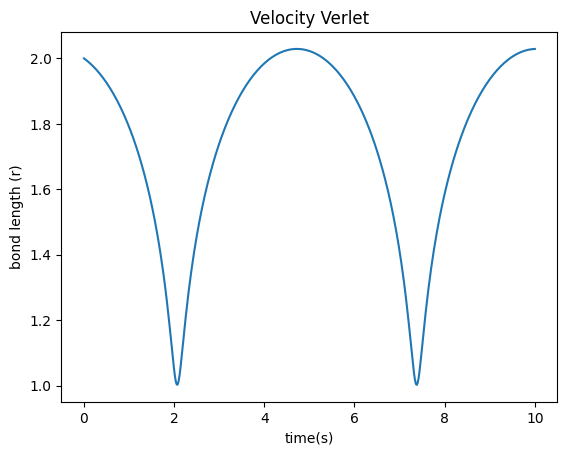

In [6]:
plt.plot(t, r)
plt.xlabel("time(s)");plt.ylabel("bond length (r)");plt.title("Velocity Verlet");plt.show()

The curve is pointed for small r because the derivative of the force around the well changes faster than at the right side of the well. This results in fast changes to r when it contracts to and extends from 1. 

## A3: Conservation of Energy
### a)

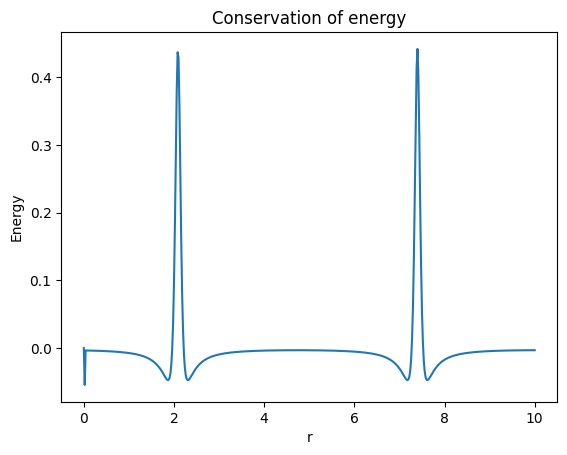

In [7]:
energy =[0]
for i in range(0, 500):
    a_v = (v[i] - v[i-1])/h
    a_v_1 = (v[i+1] - v[i])/h
    energy_new = (((m*a_v) + (m*a_v_1))/2)*h
    energy.append(energy_new)
plt.plot(t, energy);plt.xlabel("r");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

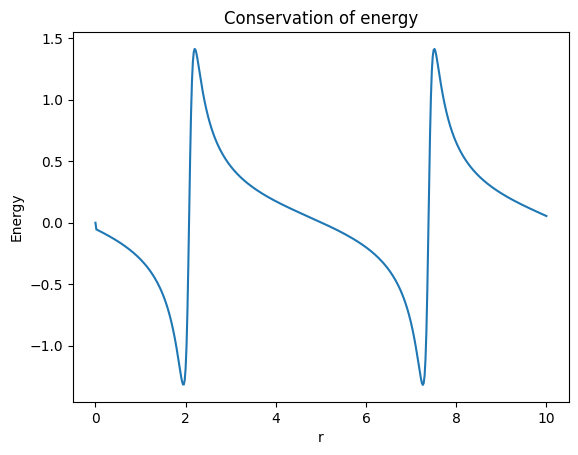

In [8]:
energy =[0]
for i in range(0, 500):
    a_v = (v[i] - v[i-1])/h
    a_v_1 = (v[i+1] - v[i])/h
    energy_new = (((m*a_v) + (m*a_v_1))/2)*h
    energy.append(energy[-1] + energy_new)
plt.plot(t, energy);plt.xlabel("r");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

#### Not sure which plot to show for this question (ASK HENKLEMANN)

### b)

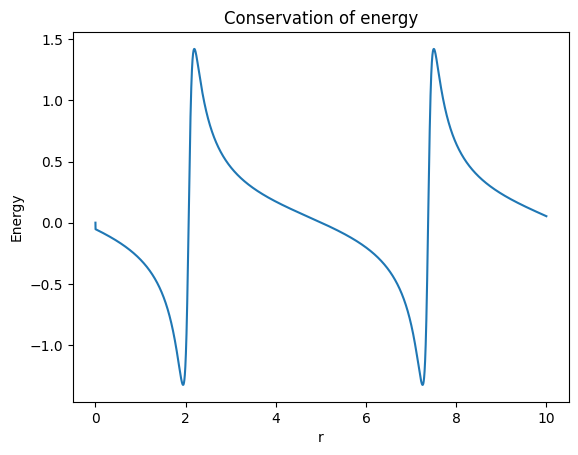

In [15]:
r0 = 2 
v0 = -0.1
r = [r0]
v = [v0]
h = 0.0001
m = 1
t = [0]
end_time = 10

while t[-1] < end_time - h:
    Fr = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #this expression is essentially the one from the last cell
    r_new = r[-1] + (h*v[-1]) + (((h**2)*Fr)/(2*m)) #step 1
    r.append(r_new)
    Fr_new = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #step 2
    v_new = v[-1] + ((h/2*m)*(Fr + Fr_new)) #step 3
    v.append(v_new)
    t.append(t[-1] + h)
energy =[0]
for i in range(0, 100000):
    a_v = (v[i] - v[i-1])/h
    a_v_1 = (v[i+1] - v[i])/h
    energy_new = (((m*a_v) + (m*a_v_1))/2)*h
    energy.append(energy[-1] + energy_new)
plt.plot(t, energy);plt.xlabel("r");plt.ylabel("Energy");plt.title("Conservation of energy");plt.show() 

#### The error in energy does not change. (Does this make sense?)
### c)

Text(0.5, 1.0, 'Conservation of energy')

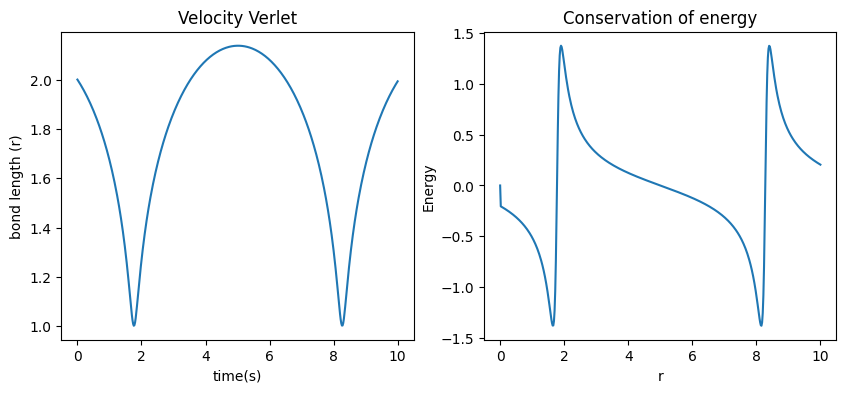

In [24]:
r0 = 2 
v0 = -0.2
r = [r0]
v = [v0]
h = 0.02
m = 1
t = [0]
end_time = 10

while t[-1] < end_time - h:
    Fr = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #this expression is essentially the one from the last cell
    r_new = r[-1] + (h*v[-1]) + (((h**2)*Fr)/(2*m)) #step 1
    r.append(r_new)
    Fr_new = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #step 2
    v_new = v[-1] + ((h/2*m)*(Fr + Fr_new)) #step 3
    v.append(v_new)
    t.append(t[-1] + h)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy =[0]
for i in range(0, 500):
    a_v = (v[i] - v[i-1])/h
    a_v_1 = (v[i+1] - v[i])/h
    energy_new = (((m*a_v) + (m*a_v_1))/2)*h
    energy.append(energy[-1] + energy_new)
axs[1].plot(t, energy);axs[1].set_xlabel("r");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

Text(0.5, 1.0, 'Conservation of energy')

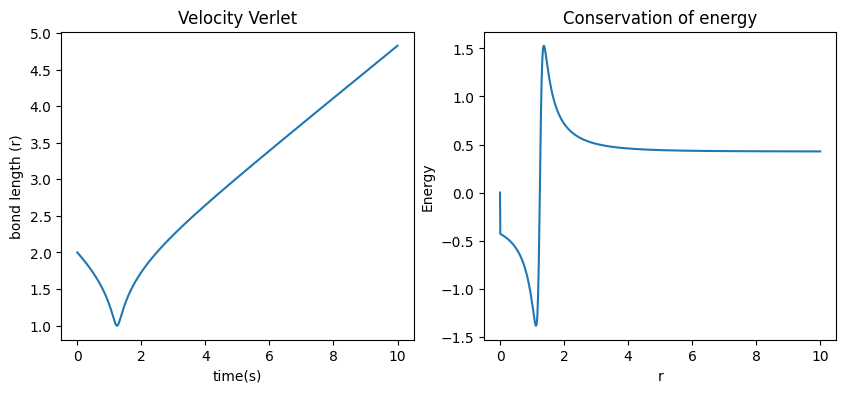

In [32]:
r0 = 2 
v0 = -0.5
r = [r0]
v = [v0]
h = 0.01
m = 1
t = [0]
end_time = 10

while t[-1] < end_time - h:
    Fr = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #this expression is essentially the one from the last cell
    r_new = r[-1] + (h*v[-1]) + (((h**2)*Fr)/(2*m)) #step 1
    r.append(r_new)
    Fr_new = -(24*(((epsilon*(sigma**6))/r[-1]**7) - (2*epsilon*(sigma**12))/r[-1]**13)) #step 2
    v_new = v[-1] + ((h/2*m)*(Fr + Fr_new)) #step 3
    v.append(v_new)
    t.append(t[-1] + h)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(t, r)
axs[0].set_xlabel("time(s)");axs[0].set_ylabel("bond length (r)");axs[0].set_title("Velocity Verlet")

energy =[0]
for i in range(0, 1000):
    a_v = (v[i] - v[i-1])/h
    a_v_1 = (v[i+1] - v[i])/h
    energy_new = (((m*a_v) + (m*a_v_1))/2)*h
    energy.append(energy[-1] + energy_new)
axs[1].plot(t, energy);axs[1].set_xlabel("r");axs[1].set_ylabel("Energy");axs[1].set_title("Conservation of energy")

#### When  you increase the energy of the system, the bond breaks.